# Nonlinear Relationships

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
import pandas as pd

In [42]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [43]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
y = boston_data.target

## Brief Introduction to Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
X = df[['LSTAT']].values

In [47]:
tree = DecisionTreeRegressor(max_depth=5)

In [48]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
sort_idx = X.flatten().argsort()

In [50]:
sort_idx

array([161, 162,  40, 232, 192, 204,   3, 370, 195, 275, 282, 202, 256,
       226, 268, 283, 368, 163, 290, 274, 252, 253, 291,  98, 251, 166,
       369, 229, 280, 203, 228, 233,  57,   2, 196, 224, 277,  97,  39,
       194, 200, 186, 353, 308, 199, 188, 157, 281, 344, 225,  65, 191,
       292, 237, 299,  55, 182,  41, 279, 303, 298,   0, 193, 179, 325,
       190, 257, 243,   5, 231,  52, 364,  80,   4, 175, 189, 341, 351,
       160,  88,  72, 355, 503, 333, 183,  89,  56,  42, 349, 250, 262,
       311, 350, 348, 276, 300, 324, 326,  99,  93, 295, 177, 238, 347,
       227, 158, 306, 504,  85, 249, 254, 273,  16, 271, 198,  95, 187,
        70,  82,  62, 334,  74,  58, 321, 259, 178, 304, 482, 365, 287,
       343, 278, 320,  81, 261, 329, 239, 296, 159, 201,  43, 267,  83,
       307,  73, 180, 288, 223, 101, 322, 272, 481, 360, 258, 352, 332,
       284, 505, 313, 335,  64, 354, 234,  67, 264,  92,  91, 285,  13,
        53,  87,  15, 338, 293, 197, 342, 302,  37,  69,  90, 37

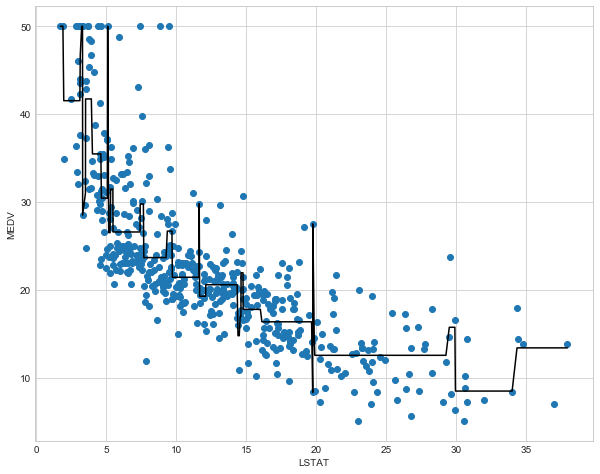

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

***

Using `max_depth` of 5 led to overfitting. Let's try 2 instead.

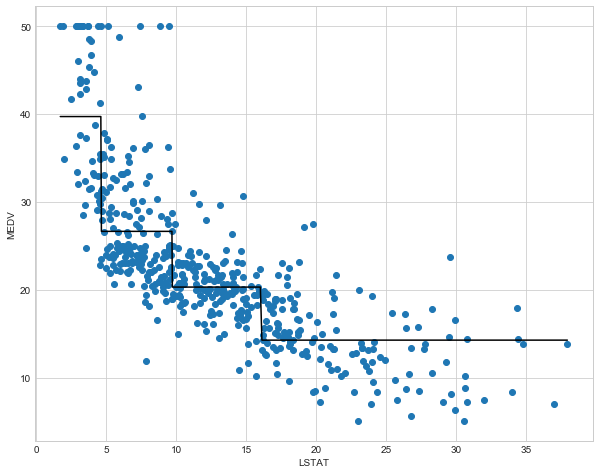

In [52]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

# Brief Introduction to Random Forest

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
X = df.values
#y = df['MEDV'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                               random_state=42, n_jobs=-1)

In [59]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [60]:
y_train_pred = forest.predict(X_train)

In [61]:
y_test_pred = forest.predict(X_test)

In [62]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 1.8700, test: 9.3921


In [63]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9787, test: 0.8740


# Brief Introduction to AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)

In [ ]:
ada.fit(X_train, y_train)

In [ ]:
y_train_pred = ada.predict(X_train)

In [ ]:
y_test_pred = ada.predict(X_test)

In [ ]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

In [ ]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

***

# Revisiting Feature Importance

In [ ]:
ada.feature_importances_

In [ ]:
df.columns

In [ ]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

In [ ]:
result.sort_values(by='feature', ascending=False)

In [ ]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

In [ ]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

***